In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import List, Tuple
from prettytable import PrettyTable
import warnings

warnings.filterwarnings("ignore")
plt.style.use('default')
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')
plt.rc('font', size=14)
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)
plt.rc('lines', markersize=10)

In [2]:
data_paths = {
    'insertion_25': '../results/insertion/slm_results_25.csv',
    'insertion_50': '../results/insertion/slm_results_50.csv',
    'cws_25': '../results/cws/cws_results_25.csv',
    'cws_50': '../results/cws/cws_results_50.csv',
    'sweep_25': '../results/sweep/sweep_heuristic_results_25.csv',
    'sweep_50': '../results/sweep/sweep_heuristic_results_50.csv',
    'insertion_75': '../results/insertion/slm_results_75.csv',
    'cws_75': '../results/cws/cws_results_75.csv',
    'sweep_75': '../results/sweep/sweep_heuristic_results_75.csv',
    'insertion_100': '../results/insertion/slm_results_100.csv',
    'cws_100': '../results/cws/cws_results_100.csv',
    'sweep_100': '../results/sweep/sweep_heuristic_results_100.csv'
}

In [3]:
data = {key: pd.read_csv(path) for key, path in data_paths.items()}

def determine_type(file_name):
    if file_name.startswith('C'): return 'C'
    if file_name.startswith('R') and not file_name.startswith('RC'): return 'R'
    if file_name.startswith('RC'): return 'RC'
    return 'Unknown'

for df in data.values():
    df['type'] = df['file'].apply(determine_type)

colors = {'insertion': 'dimgray', 'cws': 'darkgray', 'sweep': 'lightgray'}
vehicle_colors = {'insertion': 'lightslategrey', 'cws': 'lightsteelblue', 'sweep': 'lavender'}
time_colors = {'insertion': 'orange', 'cws': 'wheat', 'sweep': 'papayawhip'}
bar_width = 0.25

In [4]:
def plot_metrics(metric, y_label, title_suffix, colors_dict):
    for customer_size in [25, 50, 75, 100]:
        fig, ax = plt.subplots(1, 3, figsize=(13, 4), constrained_layout=True)
        for i, problem_type in enumerate(['C', 'R', 'RC']):
            for method in ['insertion', 'cws', 'sweep']:
                df = data[f'{method}_{customer_size}']
                df_filtered = df[df['type'] == problem_type]
                index = np.arange(len(df_filtered))
                ax[i].bar(index + (['insertion', 'cws', 'sweep'].index(method)) * bar_width, df_filtered[metric], bar_width, label=method.capitalize(), color=colors_dict[method])
            ax[i].set_xlabel('Instance')
            ax[i].set_ylabel(y_label)
            ax[i].set_title(f'{y_label} for {customer_size} Customers (Type {problem_type})')
            ax[i].set_xticks(index + bar_width)
            ax[i].set_xticklabels(df_filtered['file'], rotation=45, ha='right', fontsize=10)
            ax[i].legend(fontsize=10)
            ax[i].grid(linestyle='--', linewidth=0.5, color='grey', zorder=0, alpha=0.5)
        plt.savefig(f'../figures/{metric}_{title_suffix}_{customer_size}.pdf')
        plt.show()

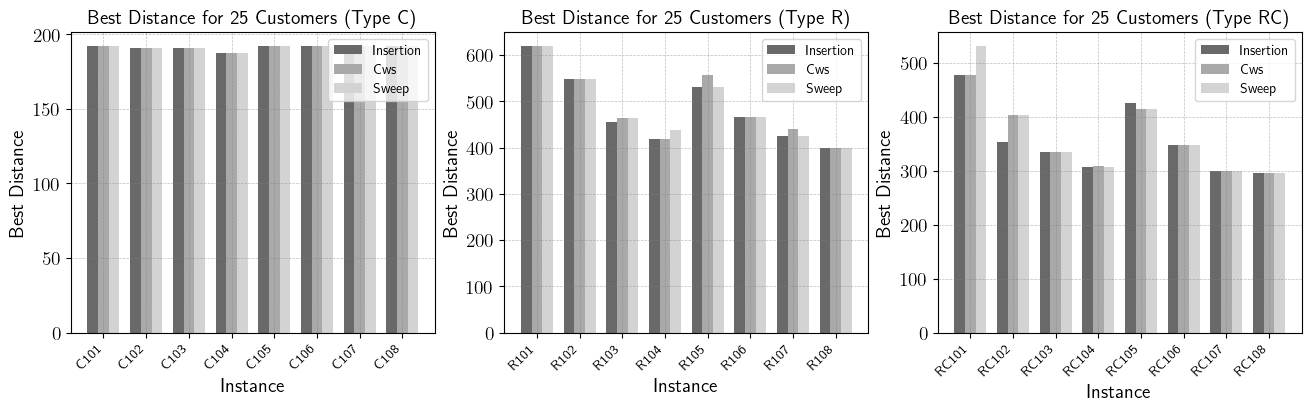

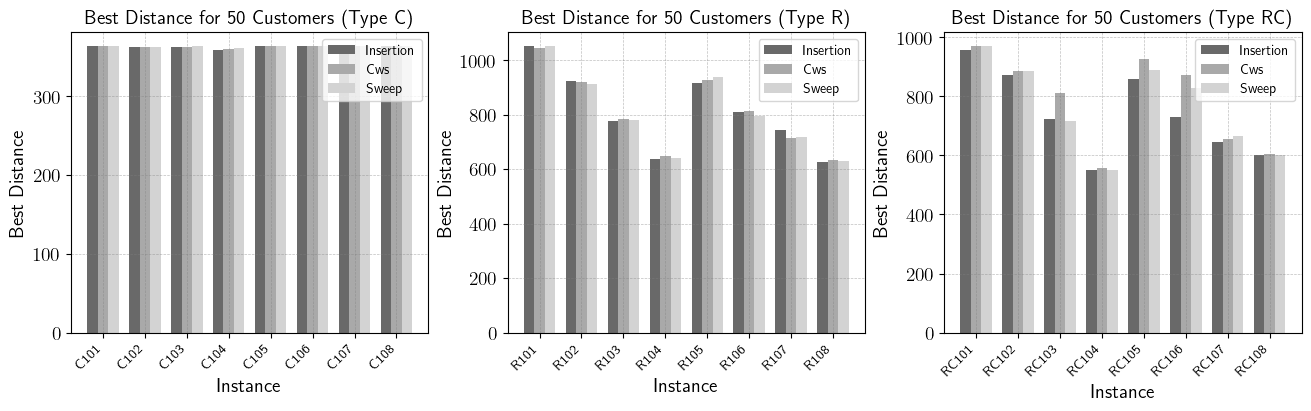

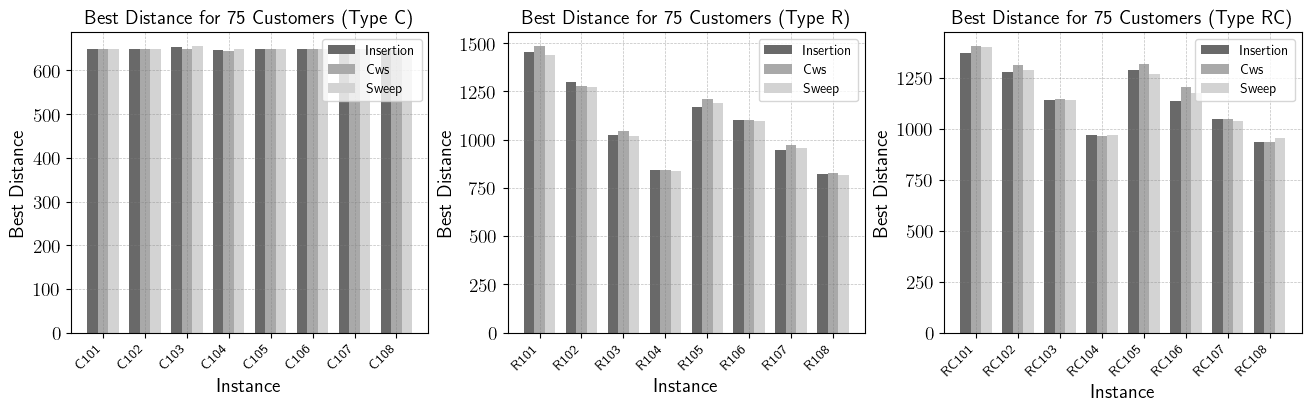

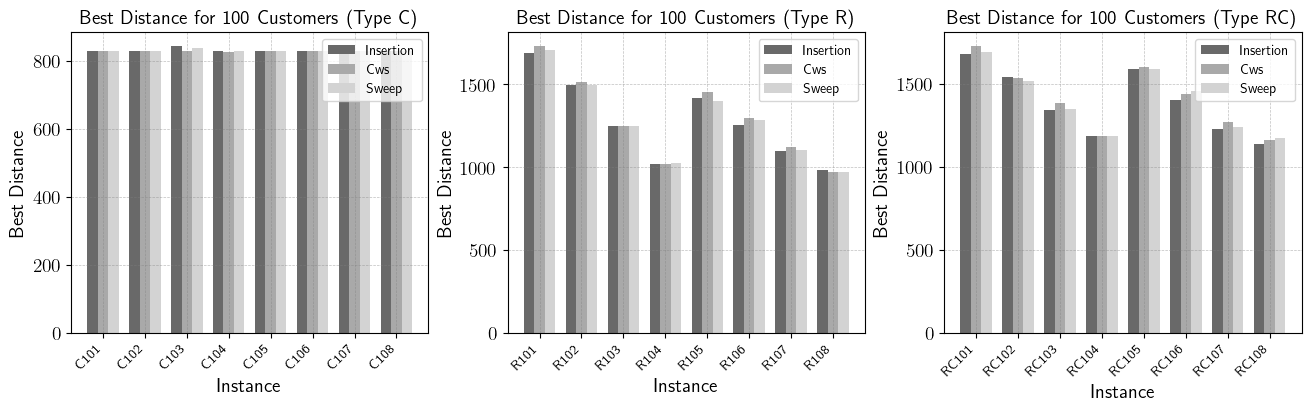

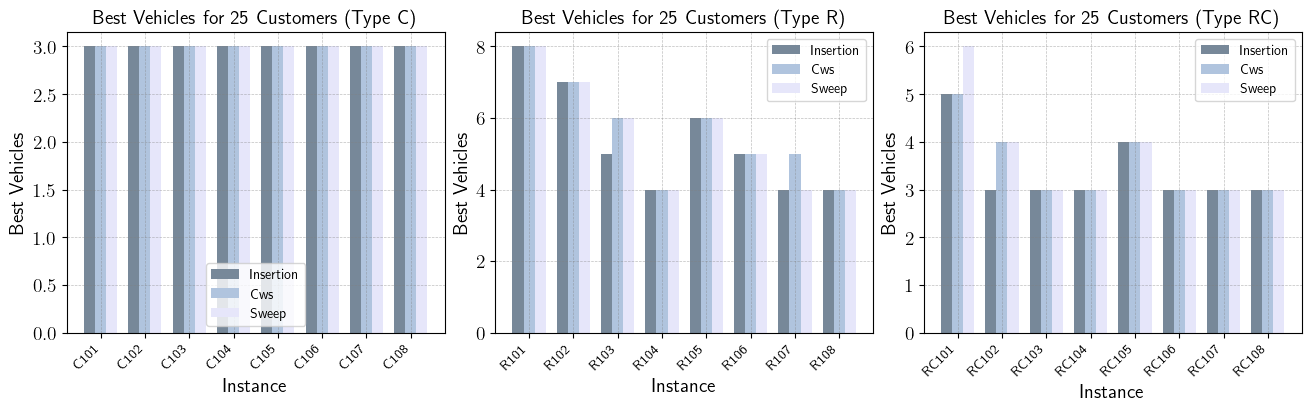

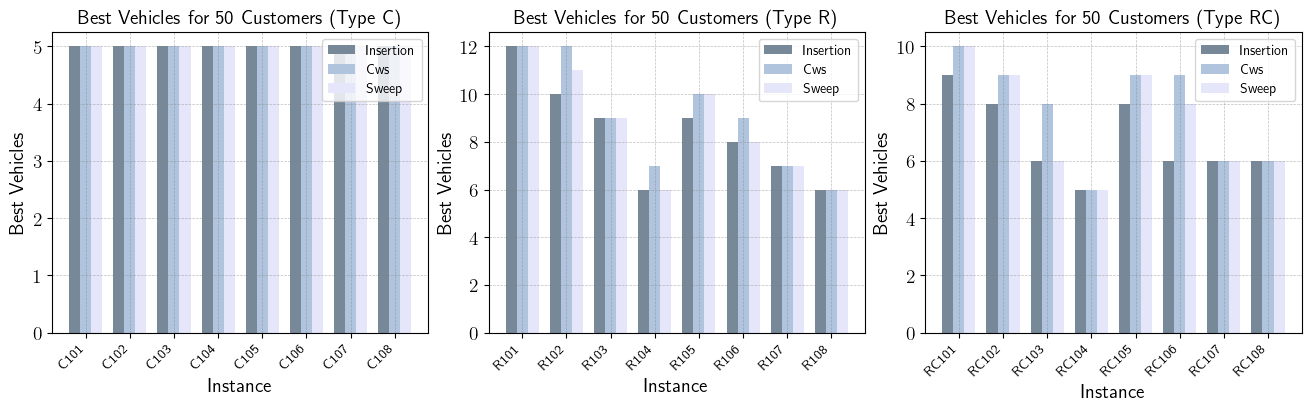

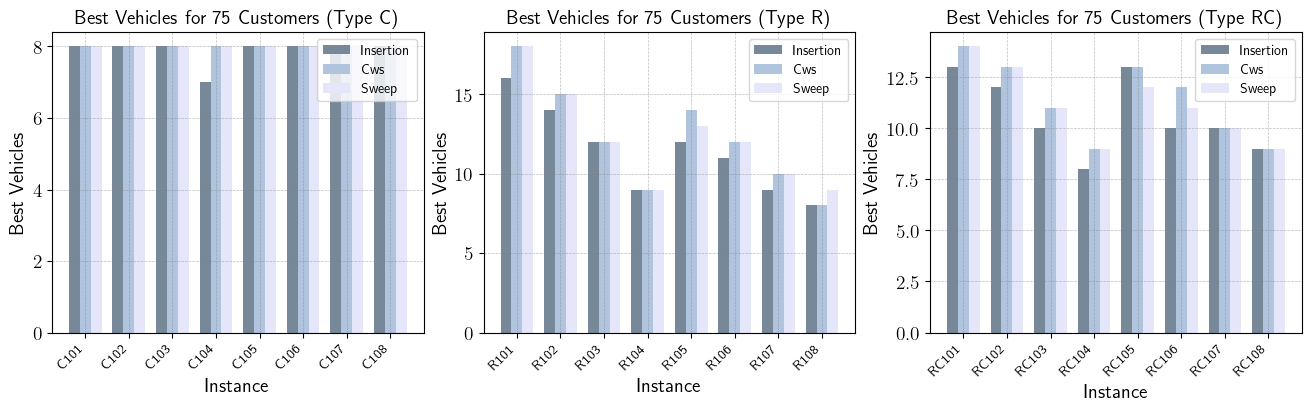

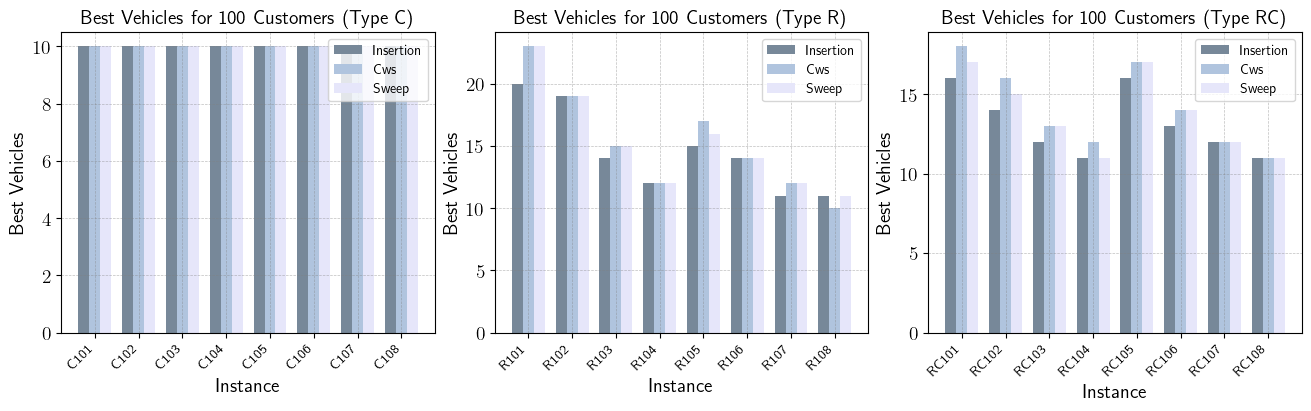

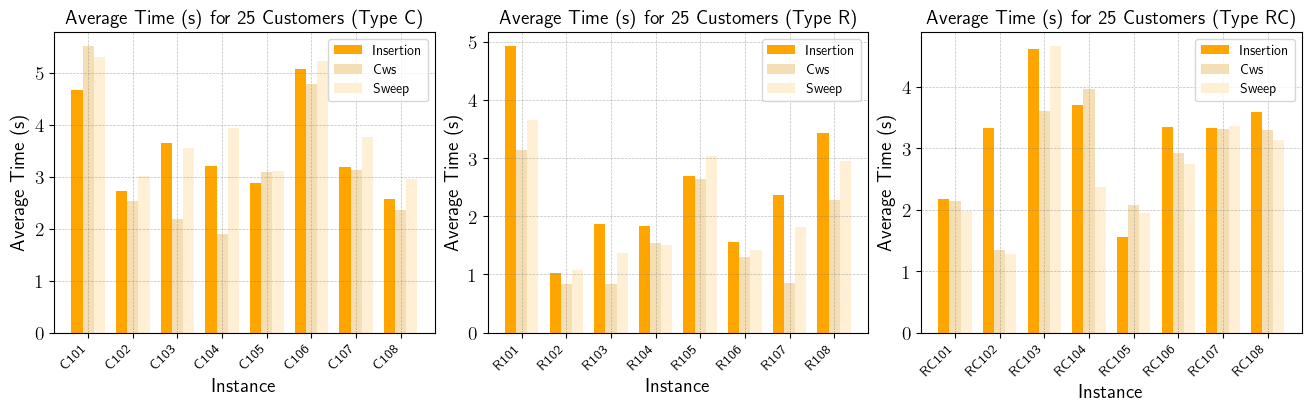

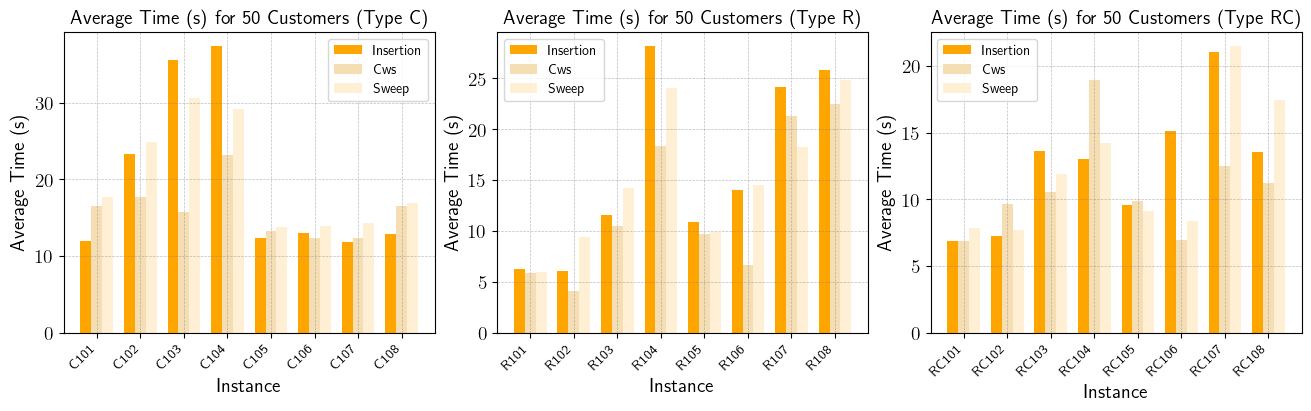

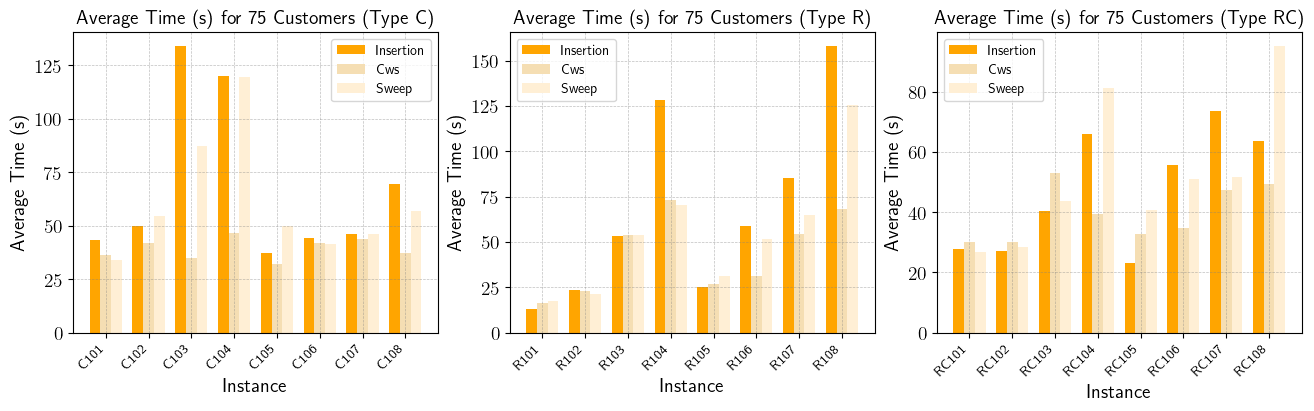

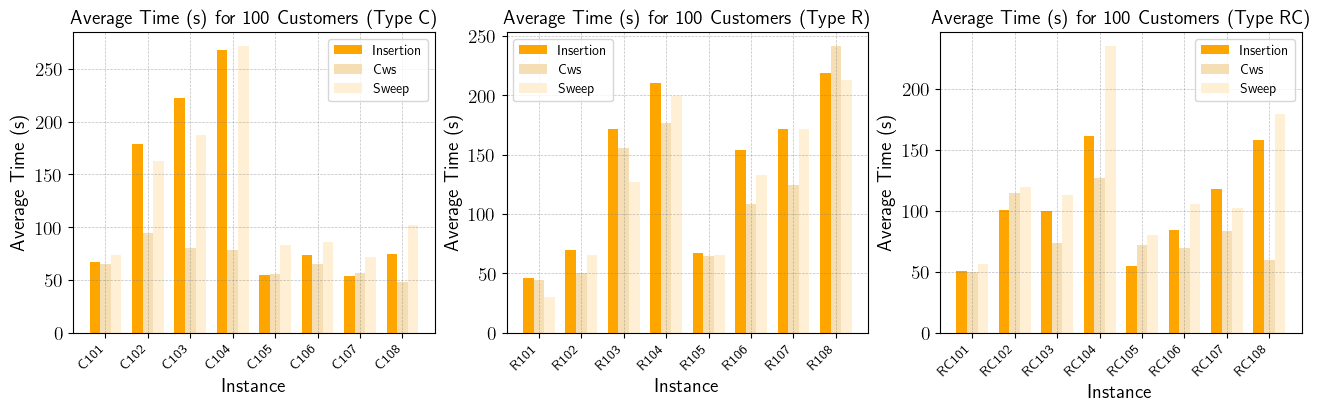

In [5]:
plot_metrics('best_distance', 'Best Distance', 'Best Distance', colors)
plot_metrics('best_vehicles', 'Best Vehicles', 'Best Vehicles', vehicle_colors)
plot_metrics('avg_time', 'Average Time (s)', 'Average Time', time_colors)

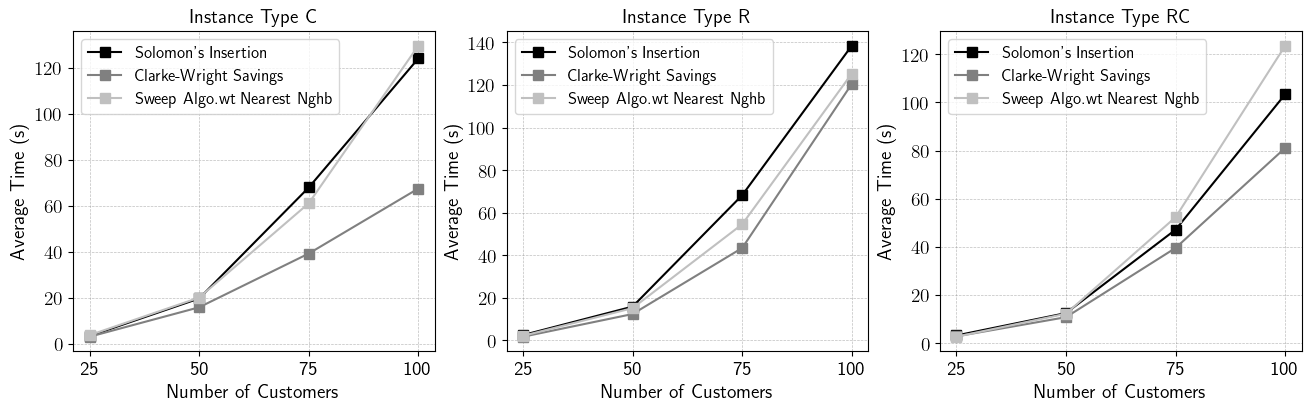

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(13, 4), constrained_layout=True)
customer_sizes = [25, 50, 75, 100]
index = np.arange(len(customer_sizes))
markers = ['o', 's', 'v', 'D']

for method, color, label in [('insertion', 'black', "Solomon's Insertion"), ('cws', 'grey', 'Clarke-Wright Savings'), ('sweep', 'silver', 'Sweep Algo.wt Nearest Nghb')]:
    for i, problem_type in enumerate(['C', 'R', 'RC']):
        means = [data[f'{method}_{size}'][data[f'{method}_{size}']['type'] == problem_type]['avg_time'].mean() for size in customer_sizes]
        stds = [data[f'{method}_{size}'][data[f'{method}_{size}']['type'] == problem_type]['avg_time'].std() for size in customer_sizes]
        ax[i].plot(index, means, marker='s', color=color, label=label, linewidth=1.5, markersize=7)
        # ax[i].fill_between(index, np.array(means) - np.array(stds), np.array(means) + np.array(stds), color=color, alpha=0.15, zorder=0)
        ax[i].set_xlabel('Number of Customers')
        ax[i].set_ylabel('Average Time (s)')
        ax[i].set_title(f'Instance Type {problem_type}')
        ax[i].set_xticks(index)
        ax[i].set_xticklabels(customer_sizes)
        ax[i].legend(fontsize=12)
        ax[i].grid(linestyle='--', linewidth=0.5, color='gray', zorder=0, alpha=0.5)
plt.savefig('../figures/avg_time_comparison.pdf')
plt.show()

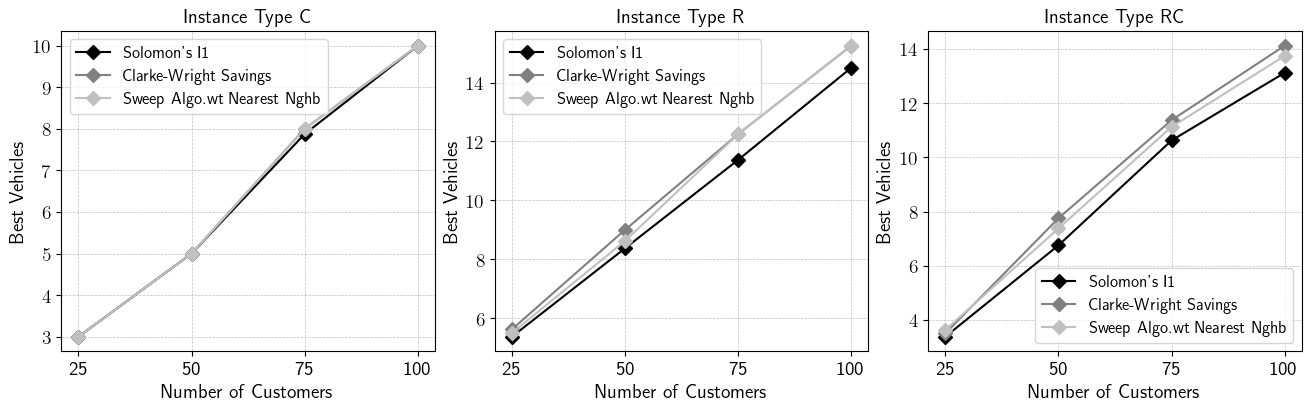

In [68]:
fig, ax = plt.subplots(1, 3, figsize=(13, 4), constrained_layout=True)

for method, color, label in [('insertion', 'black', "Solomon's I1"), ('cws', 'grey', 'Clarke-Wright Savings'), ('sweep', 'silver', 'Sweep Algo.wt Nearest Nghb')]:
    for i, problem_type in enumerate(['C', 'R', 'RC']):
        means = [data[f'{method}_{size}'][data[f'{method}_{size}']['type'] == problem_type]['best_vehicles'].mean() for size in customer_sizes]
        stds = [data[f'{method}_{size}'][data[f'{method}_{size}']['type'] == problem_type]['best_vehicles'].std() for size in customer_sizes]
        ax[i].plot(index, means, marker='D', color=color, label=label, linewidth=1.5, markersize=7)
        # ax[i].fill_between(index, np.array(means) - np.array(stds), np.array(means) + np.array(stds), color=color, alpha=0.15, zorder=0)
        ax[i].set_xlabel('Number of Customers')
        ax[i].set_ylabel('Best Vehicles')
        ax[i].set_title(f'Instance Type {problem_type}')
        ax[i].set_xticks(index)
        ax[i].set_xticklabels(customer_sizes)
        ax[i].legend(fontsize=12)
        ax[i].grid(linestyle='--', linewidth=0.5, color='grey', zorder=0, alpha=0.5)
plt.show()

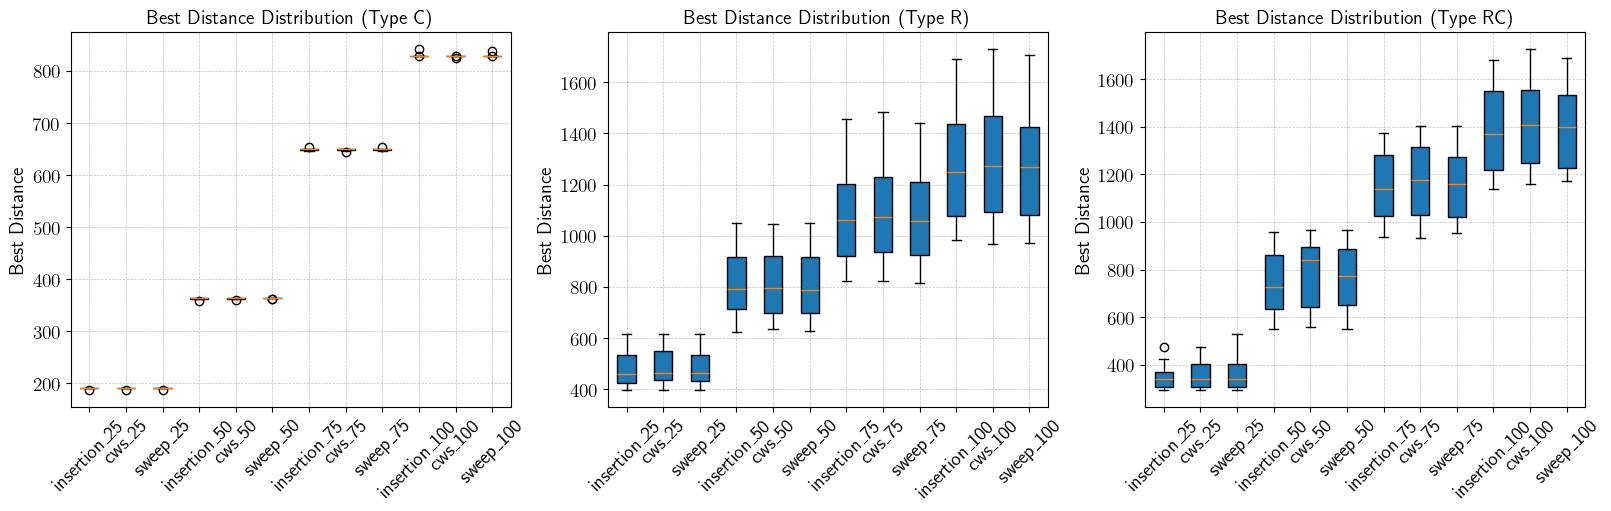

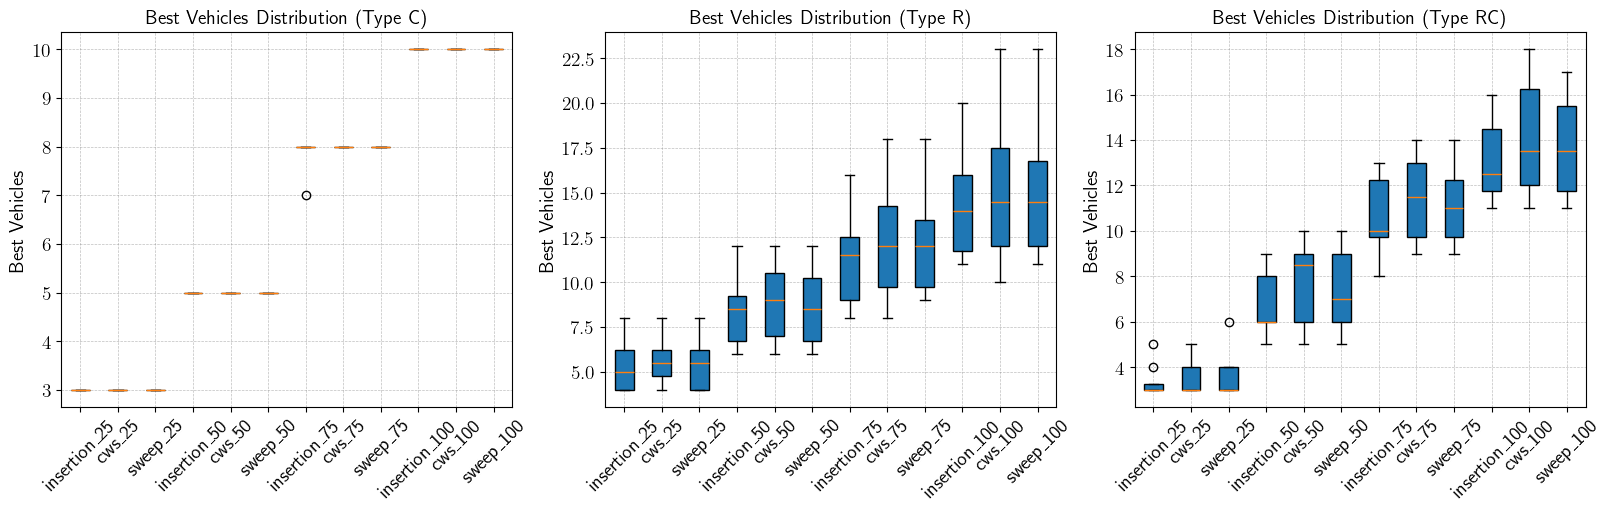

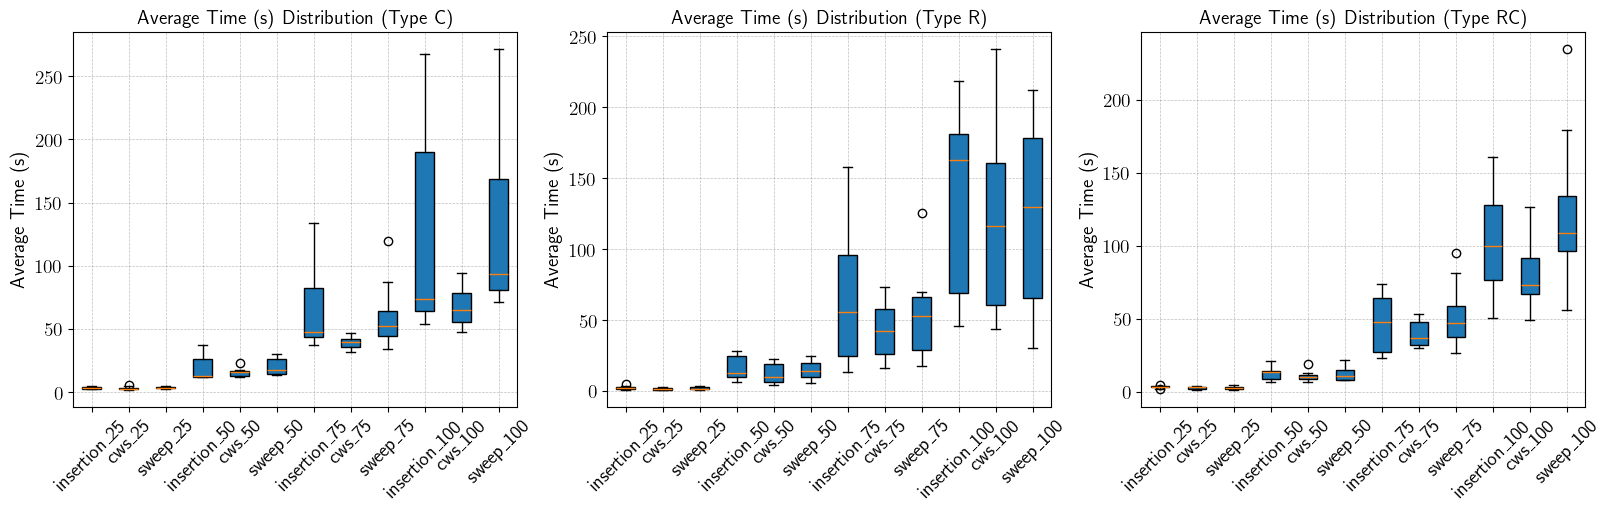

In [7]:
def plot_box(metric, y_label):
    fig, ax = plt.subplots(1, 3, figsize=(16, 5), constrained_layout=True)
    for i, problem_type in enumerate(['C', 'R', 'RC']):
        data_to_plot = []
        labels = []
        for size in customer_sizes:
            for method in ['insertion', 'cws', 'sweep']:
                df_filtered = data[f'{method}_{size}'][data[f'{method}_{size}']['type'] == problem_type]
                data_to_plot.append(df_filtered[metric].values)
                labels.append(f'{method}_{size}')
        ax[i].boxplot(data_to_plot, labels=labels, patch_artist=True)
        ax[i].set_xlabel('')
        ax[i].set_ylabel(y_label)
        ax[i].set_title(f'{y_label} Distribution (Type {problem_type})')
        ax[i].tick_params(axis='x', rotation=45)
        ax[i].grid(linestyle='--', linewidth=0.5, color='grey', zorder=0, alpha=0.5)
    plt.savefig(f'../figures/{metric}_boxplot.pdf')
    plt.show()

plot_box('best_distance', 'Best Distance')
plot_box('best_vehicles', 'Best Vehicles')
plot_box('avg_time', 'Average Time (s)')

In [13]:
insertion_10 = pd.read_csv('../results/insertion/slm_results_10.csv')
exact_scip_10 = pd.read_csv('../results/exact_results_10.csv')

In [14]:
insertion_10

,file,best_distance,avg_distance,std_distance,best_vehicles,avg_vehicles,std_vehicles,avg_time
0,R101,265.260762,265.260762,4.755862e-14,4,4.0,0.0,4.339198
1,C101,58.325953,58.325953,0.000000e+00,1,1.0,0.0,2.510748
2,RC101,185.907877,185.907877,0.000000e+00,2,2.0,0.0,2.534545
3,R102,229.768533,233.087753,1.659610e+00,3,3.0,0.0,0.223715
4,C102,57.249963,58.868995,3.410344e+00,1,1.0,0.0,0.028083
5,RC102,169.683231,169.683231,8.987734e-15,2,2.0,0.0,1.555552
6,R103,229.768533,233.087753,1.659610e+00,3,3.0,0.0,0.227342
7,C103,57.249963,58.868995,3.410344e+00,1,1.0,0.0,0.028287
8,RC103,169.683231,169.764855,1.000096e-01,2,2.0,0.0,1.758002
9,R104,198.212305,198.212305,1.556721e-14,2,2.0,0.0,0.138388


In [15]:
exact_scip_10

,file,customers,vehicles,objective,elapsed_time,running_time
0,R101,10,4,265.26,29.97,29.83
1,C101,10,1,58.33,0.70,0.56
2,RC101,10,2,185.91,3.54,3.39
3,R102,10,3,229.77,600.26,600.12
4,C102,10,1,57.25,600.41,600.27
5,RC102,10,2,169.68,600.28,600.12
6,R103,10,3,229.77,600.20,600.09
7,C103,10,1,57.25,600.31,600.20
8,RC103,10,2,169.68,600.20,600.09
9,R104,10,2,198.21,600.22,600.10


In [16]:
# Columns of exact file: 'file', 'customers', 'vehicles', 'objective', 'elapsed_time', 'running_time'
rename_dict = {'file': 'file', 'customers': 'customers', 'vehicles': 'vehicles', 'objective': 'best_distance', 'elapsed_time': 'avg_time'}
exact_scip_10 = exact_scip_10.rename(columns=rename_dict)
insertion_10 = insertion_10.rename(columns=rename_dict)

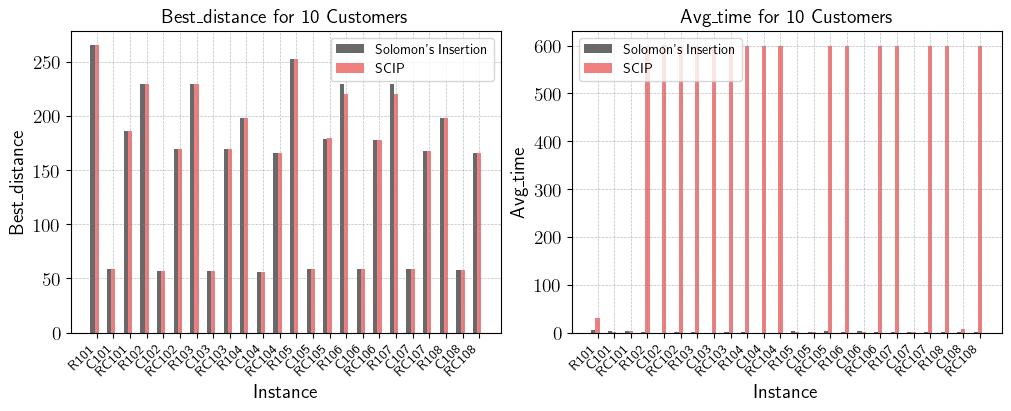

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)
index = np.arange(len(insertion_10))
bar_width = 0.25

for i, metric in enumerate(['best_distance', 'avg_time']):
    ax[i].bar(index, insertion_10[metric], bar_width, label='Solomon\'s Insertion', color='dimgray')
    ax[i].bar(index + bar_width, exact_scip_10[metric], bar_width, label='SCIP', color='lightcoral')
    ax[i].set_xlabel('Instance')
    ax[i].set_ylabel(metric.capitalize())
    ax[i].set_title(f'{metric.capitalize()} for 10 Customers')
    ax[i].set_xticks(index + bar_width)
    ax[i].set_xticklabels(insertion_10['file'], rotation=45, ha='right', fontsize=10)
    ax[i].legend(fontsize=10)
    ax[i].grid(linestyle='--', linewidth=0.5, color='grey', zorder=0, alpha=0.5)
plt.savefig('../figures/exact_vs_heuristic_10.pdf')
plt.show()